# Data Analysis with Bootstrap-coupled ESTimation (DABEST)

<p> Data Analysis with Bootstrap-coupled ESTimation (DABEST) was developed by Ho <em>et al</em>. (2019) <em>Nature Methods</em> (<a target="_blank" href="https://www.biorxiv.org/content/10.1101/377978v2.full">https://www.biorxiv.org/content/10.1101/377978v2.full</a> see <a target="_blank" href="https://rdcu.be/bHhJ4">full-text here</a>).</p>

<p> DABEST creates an <em>estimation plot</em>, aka a "Gardner–Altman plot", which shows the distribution of mean differences (or effect sizes) between conditions. A "Gardner–Altman plot" presents all data points as a swarm plot and the mean difference(s), or effect size(s), as a bootstrap 95% confidence interval.</p>

<p> See the manual for using DABEST in R at <a target="_blank" href="https://acclab.github.io/dabestr/">https://acclab.github.io/dabestr/</a>.</p>

<p> See the original R code from Ho <em>et al</em>. (2019) on <a target="_blank" href="https://github.com/ACCLAB/dabestr">GitHub</a>.</p>



# Install packages

In [1]:
# Define packages to install
packages_needed <- c('tidyverse', 'dabestr')
# Install all packages that are not already installed
install.packages(setdiff(packages_needed, rownames(installed.packages())))

library(tidyverse)
library(dabestr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘dabestr’


The following object is masked from ‘package:base’:

    load




# DABEST using github data

## Gardner-Altman estimation plot

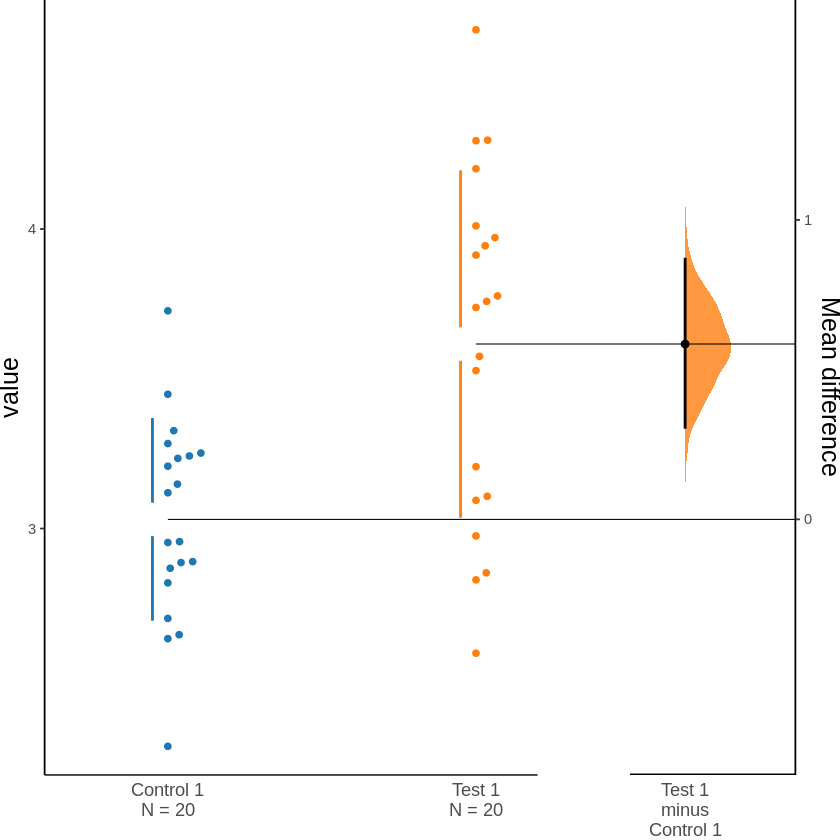

In [2]:
data("non_proportional_data")

dabest_obj.mean_diff <- load(
  data = non_proportional_data,
  x = Group,
  y = Measurement,
  idx = c("Control 1", "Test 1")
) %>%
  mean_diff()

dabest_plot(dabest_obj.mean_diff, TRUE)

## Cumming estimation plot

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


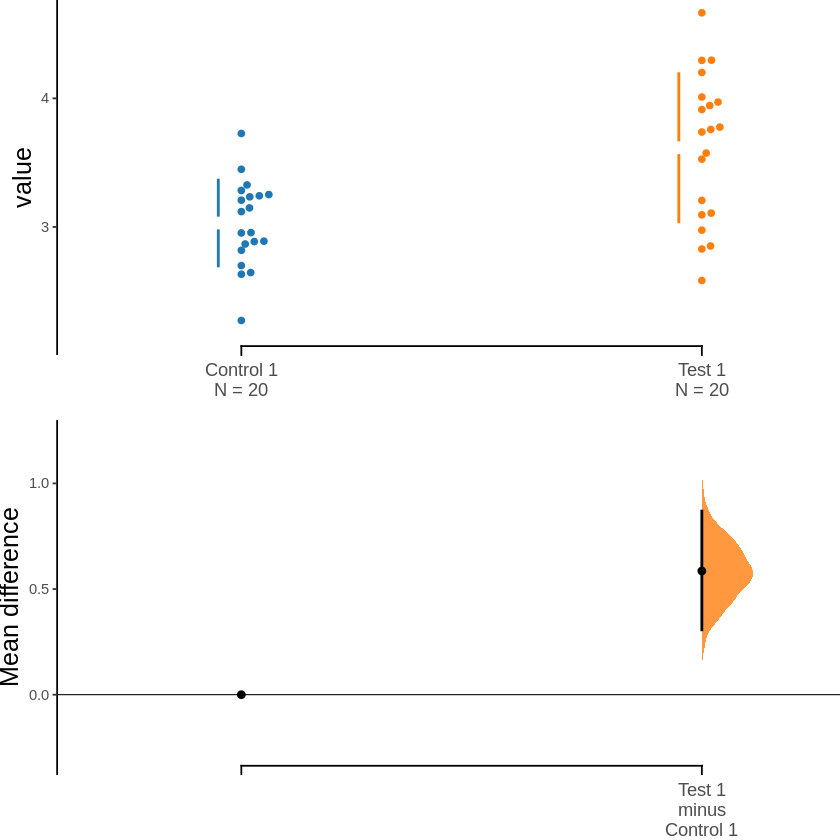

In [3]:
dabest_plot(dabest_obj.mean_diff, float_contrast = FALSE, contrast_ylim = c(-0.3, 1.3))

# DABEST using simulated data

## Simulate PAIRED data

In [4]:
# Simulate some data in R
set.seed(123)
n <- 30
C <- rnorm(n, mean = 3.0, sd = 0.5)  # Control group
T <- rnorm(n, mean = 3.3, sd = 0.5)  # Test group

# Create an "id" column for paired observations. Remove if data are UNPAIRED.
ids <- 1:n

df_simulate <- data.frame(
  id = rep(ids, 2),               # each id appears twice, one for each group
  group = rep(c("Control", "Test"), each = n),
  value = c(C, T)
)

# Examine the dataframe structure and content
str(df_simulate)

'data.frame':	60 obs. of  3 variables:
 $ id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ group: chr  "Control" "Control" "Control" "Control" ...
 $ value: num  2.72 2.88 3.78 3.04 3.06 ...


In [5]:
summary(df_simulate)

       id          group               value      
 Min.   : 1.0   Length:60          Min.   :2.017  
 1st Qu.: 8.0   Class :character   1st Qu.:2.774  
 Median :15.5   Mode  :character   Median :3.192  
 Mean   :15.5                      Mean   :3.183  
 3rd Qu.:23.0                      3rd Qu.:3.581  
 Max.   :30.0                      Max.   :4.384  

In [6]:
head(df_simulate)

,id,group,value
,<int>,<chr>,<dbl>
1,1,Control,2.719762
2,2,Control,2.884911
3,3,Control,3.779354
4,4,Control,3.035254
5,5,Control,3.064644
6,6,Control,3.857532


In [7]:
tail(df_simulate)

,id,group,value
,<int>,<chr>,<dbl>
55,25,Test,3.187115
56,26,Test,4.058235
57,27,Test,2.525624
58,28,Test,3.592307
59,29,Test,3.361927
60,30,Test,3.407971


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


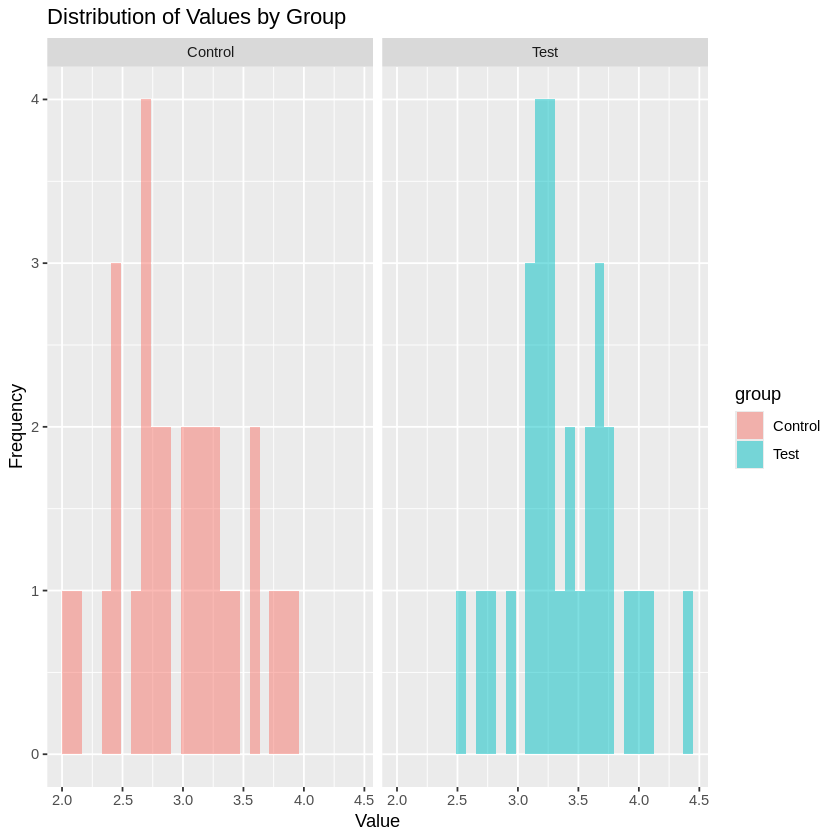

In [8]:
# Create histograms to visualize the distribution of data in each group
ggplot(df_simulate, aes(x = value, fill = group)) +
  geom_histogram(alpha = 0.5, position = "identity") +
  labs(title = "Distribution of Values by Group", x = "Value", y = "Frequency") +
  facet_wrap(~group)

## Load the data into dabestr

In [9]:
# Load the data into `dabest` with 5000 bootstrap samples. Use paired="baseline" to indicate that the data are paired and id_col=id to help DABEST find the paired identiers
# NOTE: By default, 5000 resamples will be used to generate the effect size bootstraps
# NOTE: When only 2 paired data groups are involved, assigning either “baseline” or “sequential” to paired will give you the same numerical results.
dabest_simulate <- load(df_simulate, x = group, y = value, idx = c("Control", "Test"), paired = "baseline", id_col = id, resamples = 5000)

## Mean difference for PAIRED data

In [10]:
# calculate the mean difference (use median＿diff for the median difference)
dabest_simulate.mean_diff <- mean_diff(dabest_simulate)
print(dabest_simulate.mean_diff)

DABESTR v2023.9.12

Good afternoon!
The current time is 13:11 PM on Friday February 21, 2025.

The paired mean difference between Test and Control is 0.413 [95%CI 0.178, 0.634].
The p-value of the two-sided permutation t-test is 0.0010, calculated for legacy purposes only.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing the effect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.



### Gardner-Altman estimation plot

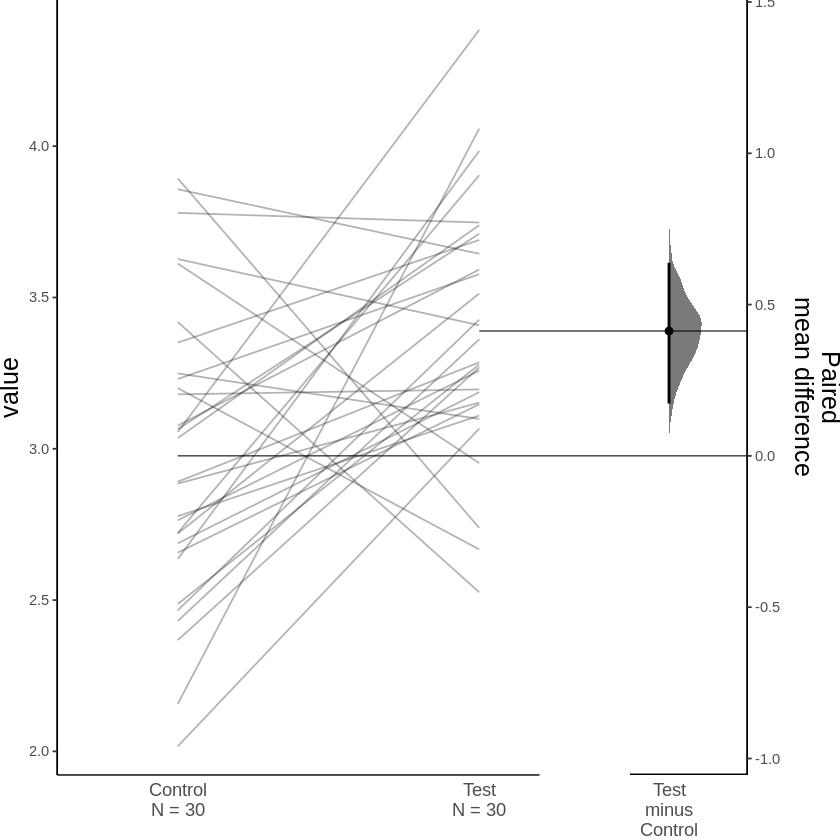

In [11]:
# build the estimation plot (Gardner-Altman plot) for the mean difference
dabest_plot(dabest_simulate.mean_diff, raw_marker_size = 0.5, raw_marker_alpha = 0.3)

### Cumming estimation plot

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


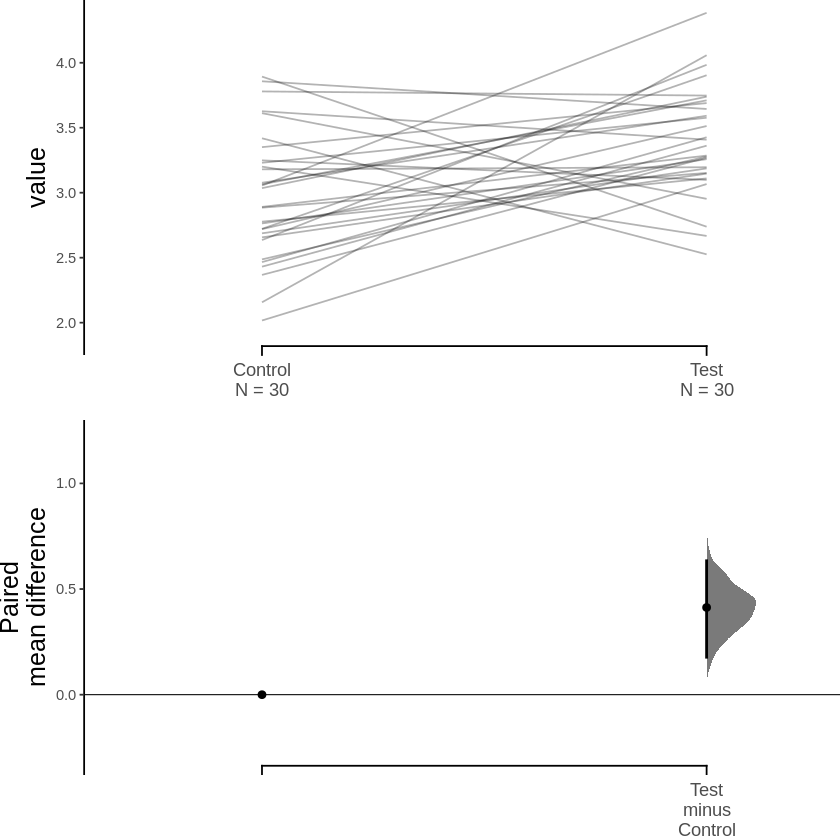

In [12]:
# Instead of a Gardner-Altman plot, you can generate a Cumming estimation plot by setting float_contrast=False in the plot() method.
dabest_plot(dabest_simulate.mean_diff, float_contrast = FALSE, raw_marker_size = 0.5, raw_marker_alpha = 0.3, contrast_ylim = c(-0.3, 1.3))